# **Práctica 8: Forecasting**

Se carga el dataset, seleccionamos el año como nuestra variable numérica y agrupamos las ventas globales por año

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("/content/Video_Games_Sales_Cleaned.csv")

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Global_Sales'])

sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

sales_by_year = sales_by_year.sort_values('Year')
print(sales_by_year.head())


   Year  Global_Sales
0  1980         11.38
1  1981         35.77
2  1982         28.86
3  1983         16.79
4  1984         50.36


Visualizamos la tendencia histórica

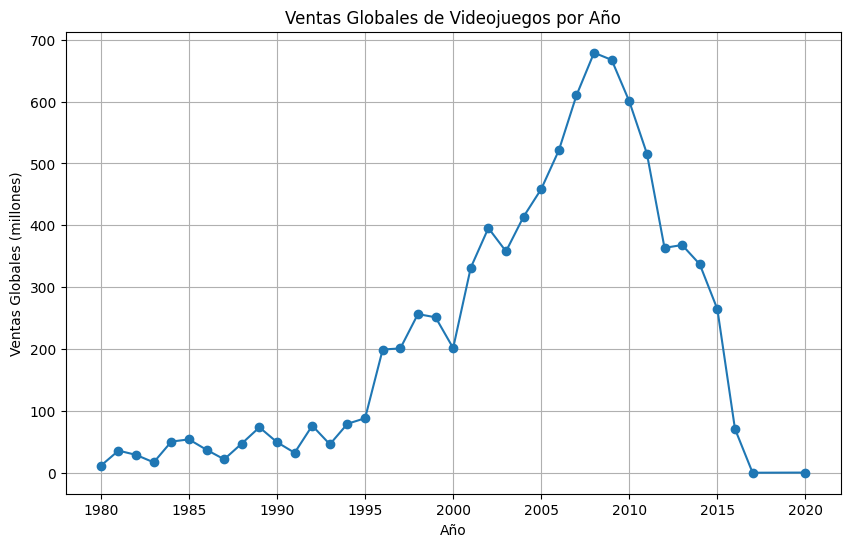

In [2]:
plt.figure(figsize=(10,6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o')
plt.title("Ventas Globales de Videojuegos por Año")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.grid(True)
plt.show()


Creamos el modelo de regresión lineal

In [3]:
# Preparar los datos para el modelo
X = sales_by_year[['Year']]
y = sales_by_year['Global_Sales']

# Entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Predicciones dentro del rango de años
y_pred = model.predict(X)

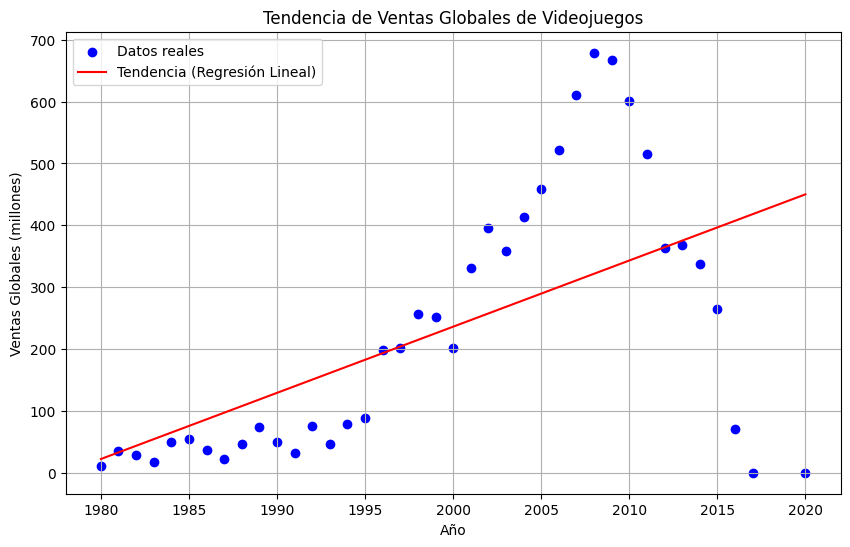

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Datos reales", color='blue')
plt.plot(X, y_pred, color='red', label="Tendencia (Regresión Lineal)")
plt.title("Tendencia de Ventas Globales de Videojuegos")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.legend()
plt.grid(True)
plt.show()

Pronosticar años futuros (5 años siguientes)

Pronóstico de ventas para los próximos años:
   Year  Predicted_Global_Sales
0  2021              460.698061
1  2022              471.393452
2  2023              482.088843
3  2024              492.784233
4  2025              503.479624


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


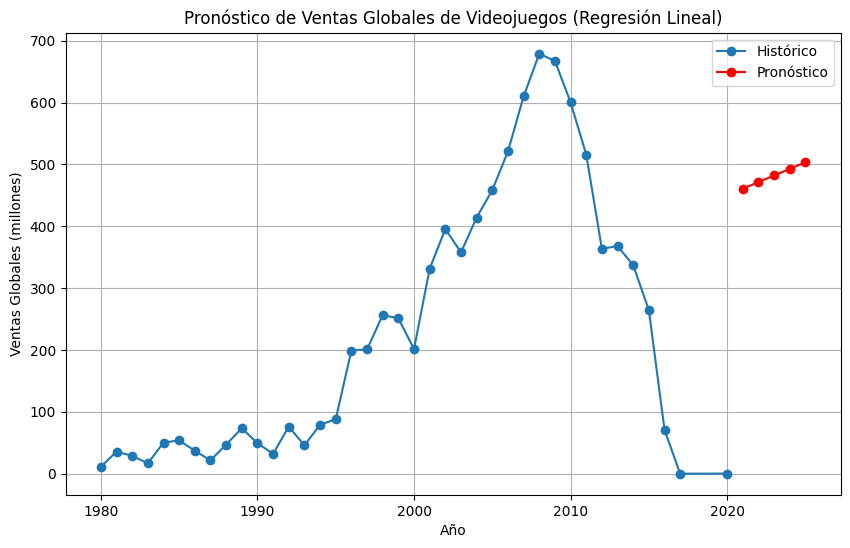

In [5]:
future_years = np.array(range(int(X['Year'].max()) + 1, int(X['Year'].max()) + 6)).reshape(-1, 1)
future_preds = model.predict(future_years)

forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Global_Sales': future_preds
})

print("Pronóstico de ventas para los próximos años:")
print(forecast_df)

# Visualizar el pronóstico
plt.figure(figsize=(10,6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], label="Histórico", marker='o')
plt.plot(future_years, future_preds, label="Pronóstico", color='red', marker='o')
plt.title("Pronóstico de Ventas Globales de Videojuegos (Regresión Lineal)")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.legend()
plt.grid(True)
plt.show()